In [88]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage

In [89]:
pd.set_option('display.max_columns', None)

In [90]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [91]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [92]:
df.shape

(541909, 8)

In [93]:
for i in df.columns:
  print("Column Name=", i)
  print(df[i].value_counts().sort_values(ascending=False))
  print("---------------------------------------------------------------------------------------------------------------")

Column Name= InvoiceNo
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
559414        1
C559417       1
536866        1
563934        1
C558901       1
Name: count, Length: 25900, dtype: int64
---------------------------------------------------------------------------------------------------------------
Column Name= StockCode
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
90184c       1
85034b       1
90183c       1
84971l       1
72759        1
Name: count, Length: 4070, dtype: int64
---------------------------------------------------------------------------------------------------------------
Column Name= Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                    

In [94]:
# Checking for Duplicates
df.duplicated().sum()

5268

In [95]:
df= df.drop_duplicates()

In [96]:
for i in df.columns:
  print("Column Name=", i)
  null_count = df[i].isnull().sum()
  print(f"Missing Values Count: {null_count}")
  print("---------------------------------------------------------------------------------------------------------------")


Column Name= InvoiceNo
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= StockCode
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= Description
Missing Values Count: 1454
---------------------------------------------------------------------------------------------------------------
Column Name= Quantity
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= InvoiceDate
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= UnitPrice
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= CustomerID
Missing Values C

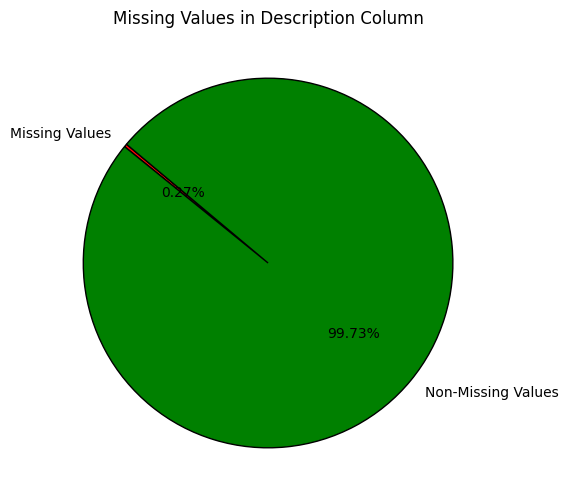

In [97]:
labels = ['Missing Values', 'Non-Missing Values']
sizes = [df['Description'].isnull().sum(), df['Description'].notnull().sum()]
colors = ['red', 'green']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Missing Values in Description Column")
plt.show()

There is 1454 missing values in Description Column.
So it is just 0.27% of the data. So we can drop it.


In [98]:
df = df.dropna()

In [99]:
for i in df.columns:
  print("Column Name=", i)
  print(df[i].value_counts().sort_values(ascending=False))
  print("---------------------------------------------------------------------------------------------------------------")

Column Name= InvoiceNo
InvoiceNo
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C568899      1
546550       1
569557       1
C568419      1
553049       1
Name: count, Length: 22190, dtype: int64
---------------------------------------------------------------------------------------------------------------
Column Name= StockCode
StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
47016        1
84963A       1
90078        1
90199B       1
84746        1
Name: count, Length: 3684, dtype: int64
---------------------------------------------------------------------------------------------------------------
Column Name= Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
5 ST

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [101]:
for i in df.columns:
  print("Column Name=", i)
  null_count = df[i].isnull().sum()
  print(f"Missing Values Count: {null_count}")
  print("---------------------------------------------------------------------------------------------------------------")


Column Name= InvoiceNo
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= StockCode
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= Description
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= Quantity
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= InvoiceDate
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= UnitPrice
Missing Values Count: 0
---------------------------------------------------------------------------------------------------------------
Column Name= CustomerID
Missing Values Coun

In [102]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [103]:
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [104]:
df = df[df['Quantity'] > 0]  # Remove negative quantities
df = df[df['UnitPrice'] > 0]  # Remove negative prices

# FEATURE ENGINEERING


In [105]:
from datetime import datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (datetime.now() - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalAmount': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

In [106]:
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0        5154          1  77183.60
12347.0        4831          7   4310.00
12348.0        4904          4   1797.24
12349.0        4847          1   1757.55
12350.0        5139          1    334.40


In [108]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Month'] = df['InvoiceDate'].dt.month

df = df.sort_values(by=['CustomerID', 'InvoiceDate'])
df['PreviousInvoiceDate'] = df.groupby('CustomerID')['InvoiceDate'].shift()
df['InterPurchaseInterval'] = (df['InvoiceDate'] - df['PreviousInvoiceDate']).dt.days

product_diversity = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
product_diversity.rename(columns={'StockCode': 'ProductDiversity'}, inplace=True)
rfm = rfm.merge(product_diversity, on='CustomerID', how='left')

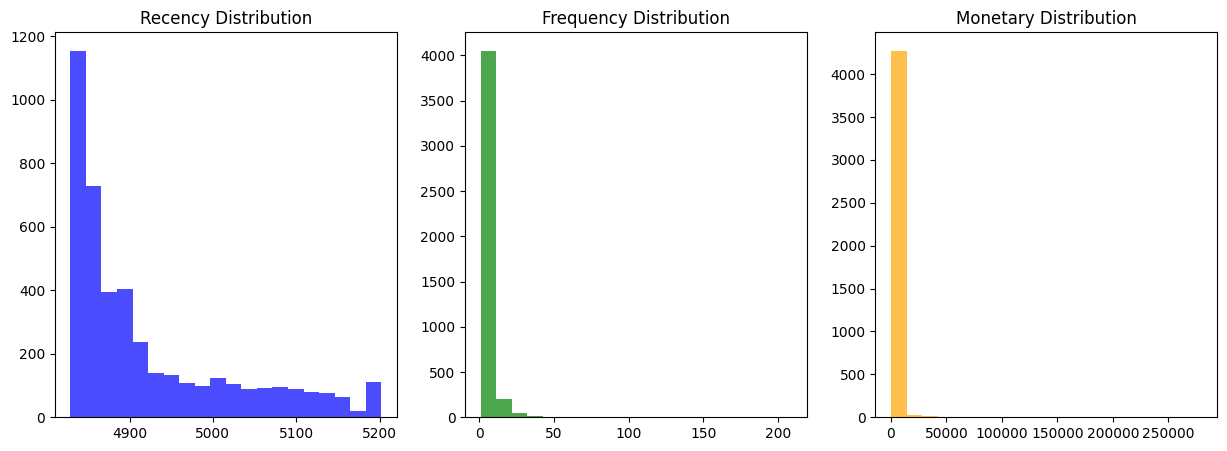

In [109]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=20, color='blue', alpha=0.7)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=20, color='green', alpha=0.7)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=20, color='orange', alpha=0.7)
plt.title('Monetary Distribution')

plt.show()

Correlation Heatmap


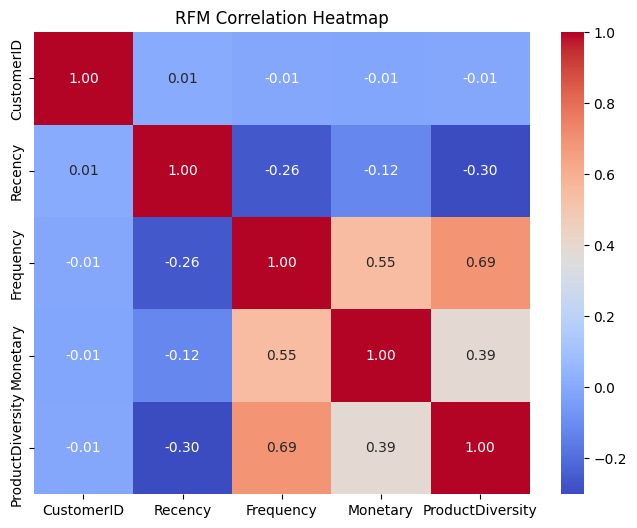

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('RFM Correlation Heatmap')
plt.show()


RFM Metrics Scatterplot


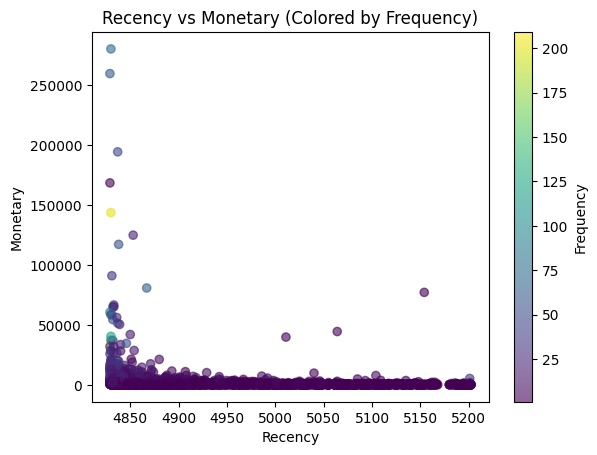

In [111]:
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Frequency'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Frequency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary (Colored by Frequency)')
plt.show()

# Clustering Techniques


1. K-Means Clustering


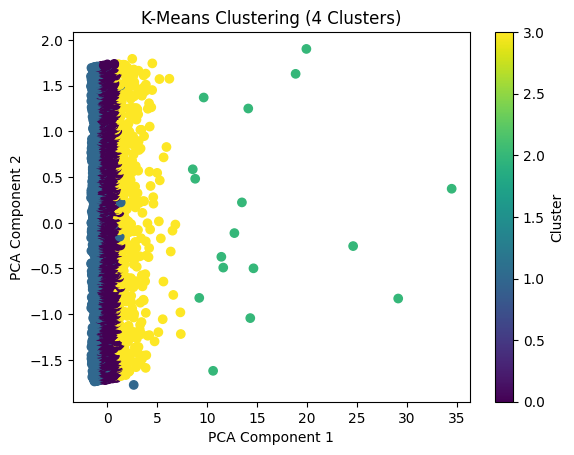

In [112]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering (4 Clusters)')
plt.colorbar(label='Cluster')
plt.show()

2. Gaussian Mixture Models (GMM):


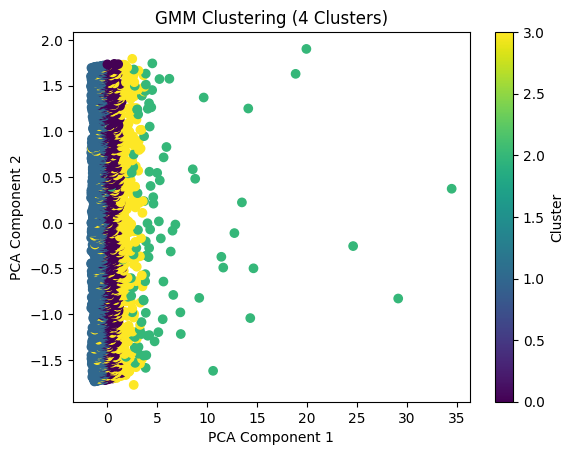

In [113]:
gmm = GaussianMixture(n_components=4, random_state=42)
rfm['Cluster'] = gmm.fit_predict(rfm_scaled)

plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering (4 Clusters)')
plt.colorbar(label='Cluster')
plt.show()

3. Hierarchal Clustering


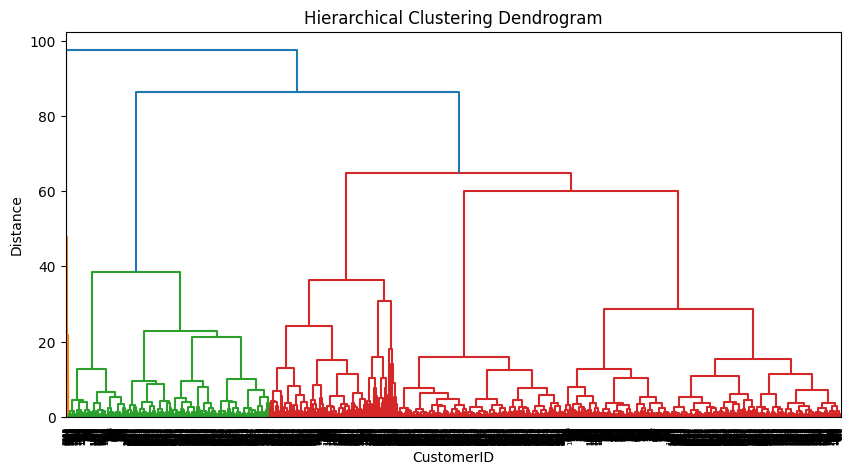

In [114]:
# hierarchical clustering
Z = linkage(rfm_scaled, method='ward')

# Plot dendrograms...
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('CustomerID')
plt.ylabel('Distance')
plt.show()

4. t-SNE Visualization


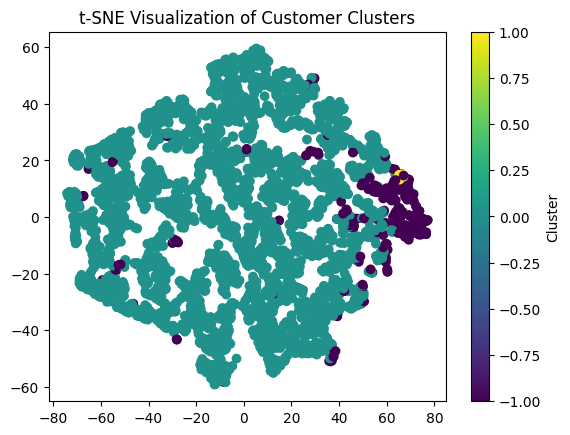

In [123]:
# apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)

# Plot t-SNE results
plt.scatter(rfm_tsne[:, 0], rfm_tsne[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()

5. DBSCAN Clustering


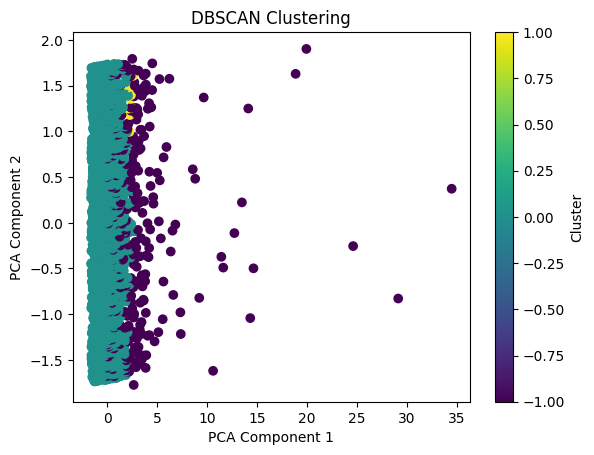

In [116]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
rfm['Cluster'] = dbscan.fit_predict(rfm_scaled)

plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

# EVALUATION


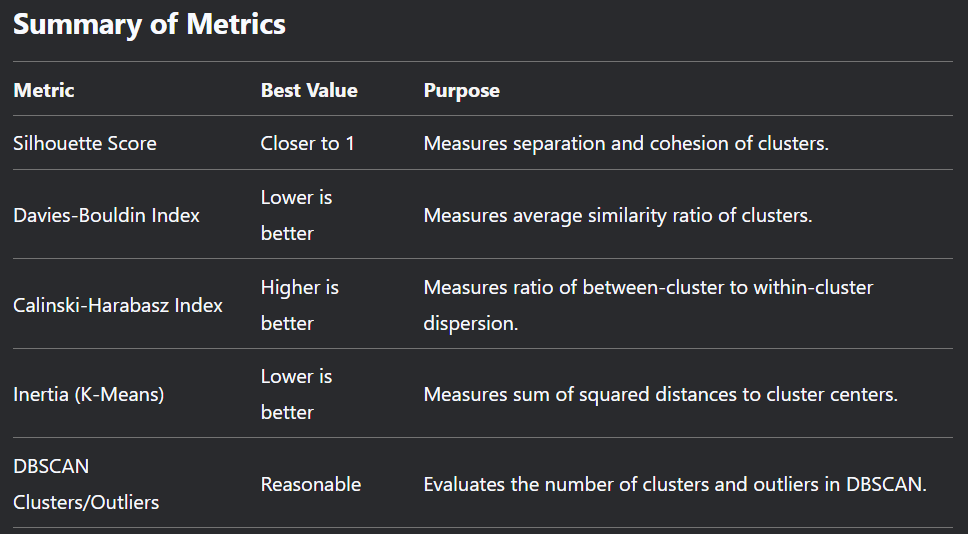


1. Inertia: It measures the sum of squared distances of samples to their closest cluster center. Lower values indicate better clustering. This metric is specific to K-Means.


In [117]:
# for K-Means only...
kmeans_inertia = kmeans.inertia_
print(f"Inertia (K-Means): {kmeans_inertia:.2f}")

Inertia (K-Means): 10826.49


2. Number of Clusters and Outliers(for DBSCAN):
   For DBSCAN, we can evaluate the number of clusters and outliers(also called as noise points).


In [118]:
# Number of clusters (excluding noise)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)

# Number of outliers
n_noise = list(dbscan.labels_).count(-1)

print(f"Number of clusters (DBSCAN): {n_clusters}")
print(f"Number of outliers (DBSCAN): {n_noise}")

Number of clusters (DBSCAN): 2
Number of outliers (DBSCAN): 286


3. Silhouette Score:
   The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where:

- 1: The clusters are well-separated
- 0: The clusters are overlapping
- -1: The clusters are incorrectly assigned


In [119]:
kmeans_score = silhouette_score(rfm_scaled, kmeans.labels_)
print(f"Silhouette Score (K-Means): {kmeans_score:.2f}")

gmm_score = silhouette_score(rfm_scaled, gmm.predict(rfm_scaled))
print(f"Silhouette Score (GMM): {gmm_score:.2f}")

dbscan_score = silhouette_score(rfm_scaled, dbscan.labels_)
print(f"Silhouette Score (DBSCAN): {dbscan_score:.2f}")

Silhouette Score (K-Means): 0.34
Silhouette Score (GMM): 0.10
Silhouette Score (DBSCAN): 0.38


4. Davies-Bouldin Index:
   The Davies-Bouldin Index measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering.


In [120]:


# a. for K-Means
kmeans_db = davies_bouldin_score(rfm_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index (K-Means): {kmeans_db:.2f}")

# b. for GMM
gmm_db = davies_bouldin_score(rfm_scaled, gmm.predict(rfm_scaled))
print(f"Davies-Bouldin Index (GMM): {gmm_db:.2f}")

# c. for DBSCAN
dbscan_db = davies_bouldin_score(rfm_scaled, dbscan.labels_)
print(f"Davies-Bouldin Index (DBSCAN): {dbscan_db:.2f}")

Davies-Bouldin Index (K-Means): 1.15
Davies-Bouldin Index (GMM): 2.18
Davies-Bouldin Index (DBSCAN): 1.46


5. Calinski-Harabasz Index:
   The Calinski-Harabasz Index measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.


In [121]:
# a. for K-Means
kmeans_ch = calinski_harabasz_score(rfm_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Index (K-Means): {kmeans_ch:.2f}")

# b. for GMM
gmm_ch = calinski_harabasz_score(rfm_scaled, gmm.predict(rfm_scaled))
print(f"Calinski-Harabasz Index (GMM): {gmm_ch:.2f}")

# c. for DBSCAN
dbscan_ch = calinski_harabasz_score(rfm_scaled, dbscan.labels_)
print(f"Calinski-Harabasz Index (DBSCAN): {dbscan_ch:.2f}")

Calinski-Harabasz Index (K-Means): 1449.65
Calinski-Harabasz Index (GMM): 597.91
Calinski-Harabasz Index (DBSCAN): 386.29
